# Categorical Support Vector Classifier

## Imports

In [32]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder 
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 

import matplotlib.pyplot as plt
import seaborn as sns

## Loading the database

#### Read the csv file and study the database

In [3]:
mushroom_data = pd.read_csv('mushrooms-full-dataset.csv')
mushroom_data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroom_data.poisonous.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

In [5]:
mushroom_data.isna().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Preprocessing

#### Define the target and the inputs

In [8]:
target = mushroom_data.poisonous
inputs = mushroom_data.drop('poisonous', axis=1)

#### Create a training and a testing dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size=0.2,
                                                    random_state=365,
                                                    stratify=taret)

#### Check the result from the stratification

In [14]:
target.value_counts(normalize=True)

e    0.517971
p    0.482029
Name: poisonous, dtype: float64

In [15]:
y_train.value_counts(normalize=True)

e    0.517926
p    0.482074
Name: poisonous, dtype: float64

#### Define a separate encoder for the target and the inputs 

In [16]:
enc_i = OrdinalEncoder()
enc_t = LabelEncoder()

#### Apply the fit_transform() method on the training data and the transform() method on the test data.

In [17]:
X_train_trans = enc_i.fit_transform(X_train)
X_test_trans = enc_i.transform(X_test)

y_train_trans = enc_t.fit_transform(y_train)
y_test_trans = enc_t.transform(y_test)

In [18]:
X_train_trans

array([[3., 3., 2., ..., 7., 1., 6.],
       [5., 3., 4., ..., 2., 5., 4.],
       [2., 0., 4., ..., 2., 4., 0.],
       ...,
       [2., 3., 2., ..., 7., 4., 0.],
       [3., 0., 8., ..., 7., 3., 1.],
       [5., 0., 3., ..., 3., 4., 0.]])

## Rescaling

### In order for the SVC to work correctly the inputs need to be rescaled to the range (-1, 1)

In [19]:
scaler = MinMaxScaler(feature_range=(-1,1))

X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

## Classification

In [26]:
C = 1.0

svc = svm.SVC(kernel='linear', C= C)

svc.fit(X_train_scaled, y_train_trans)

SVC(kernel='linear')

In [28]:
y_pred = svc.predict(X_test_scaled)

## Evaluation

#### Evaluate the model on the test data

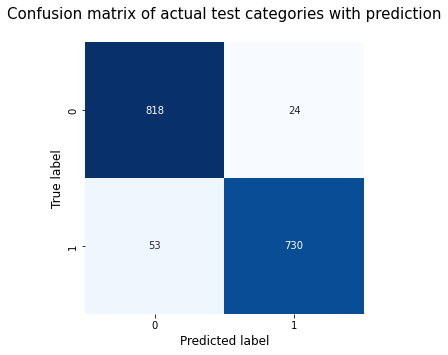

In [46]:
plt.figure(figsize=(5,5))

plt.title('Confusion matrix of actual test categories with prediction\n', fontdict={'fontsize' : 15})

sns.heatmap(confusion_matrix(y_test_trans, y_pred), 
            annot= True, cbar= False, fmt='.0f', cmap='Blues')

plt.xlabel('Predicted label', fontdict={'fontsize' : 12})
plt.ylabel('True label', fontdict={'fontsize' : 12})

plt.show()

In [29]:
print(classification_report(y_test_trans, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       842
           1       0.97      0.93      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



## Hyperparameter Tuning with GridSearchCV

### Choose the best kernel and optimal C parameter based on Cross Validation of the training data

In [58]:
tuned_parameters = [
    {"kernel": ["linear"], "C": [1, 10]},
    {"kernel": ["poly"], "C":[1, 10]},
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10]}
]

In [61]:
scores = ["precision", "recall"]

In [64]:
svc = svm.SVC()

for score in scores:
    print(f'Tuning hyper-parameter for {score}\n')
    
    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring= score)
    clf.fit(X_train_scaled, y_train_trans)
    
    print(f'Best parameters set found on development set:\n')
    print(clf.best_params_, '\n')
    print('Grid scores on development set:\n')
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print(f'{round(mean,3)} (+/- {round(std * 2,3)} for {params}\n')
    
    print('Detailed Classification report:\n')
    print('The model is trained on the full development set.')
    print('The scores are computed on the full evaluation set.\n')
    
    y_true, y_pred = y_test_trans, clf.predict(X_test_scaled)
    
    print(classification_report(y_true, y_pred), '\n')
    
    

Tuning hyper-parameter for precision

Best parameters set found on development set:

{'C': 1, 'kernel': 'poly'} 

Grid scores on development set:

0.957 (+/- 0.014 for {'C': 1, 'kernel': 'linear'}

0.952 (+/- 0.015 for {'C': 10, 'kernel': 'linear'}

1.0 (+/- 0.0 for {'C': 1, 'kernel': 'poly'}

1.0 (+/- 0.0 for {'C': 10, 'kernel': 'poly'}

0.945 (+/- 0.007 for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

0.94 (+/- 0.009 for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

0.954 (+/- 0.015 for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

0.945 (+/- 0.007 for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed Classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00   